# DATA PREPROCESSING

## Importing the libraries

In [1]:
import tensorflow as tf
import pandas as pd
from scipy.stats import chi2_contingency
from datetime import datetime
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(tf.__version__)

2.14.0


## Importing the dataset

In [3]:
# Dataset with all columns
dataset = pd.read_csv("Dataset/credit_card_subset.csv")
dataset

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-07-21 17:20:32,"Kilback, Nitzsche and Leffle",travel,5.69,Mound City,MO,40.1362,-95.2138,1631,Architect,1953-01-20,657f3b5d8265a7baed9b094f95b93f39,40.591103,-94.445245,0
1,2019-10-07 12:10:26,Christiansen-Gusikowski,misc_pos,51.20,Rocky Mount,MO,38.2911,-92.7059,1847,Tax inspector,1988-10-26,a0a6120995d90497124eb9117797dc2a,38.682440,-93.288181,0
2,2020-12-27 12:40:48,Gulgowski LLC,home,225.07,Tomales,CA,38.2427,-122.9145,337,Occupational psychologist,1954-07-05,737b67154bcfb5fa19edfed0b5dc9640,38.593997,-122.226545,0
3,2020-11-20 03:11:53,Hudson-Ratke,grocery_pos,121.80,Lagrange,WY,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,9bfac49eb4605e0a7560ac91a526164a,41.219040,-104.248942,0
4,2019-12-08 07:33:54,Hermann-Gaylo,misc_pos,140.93,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,0560bebe84613889bff8924f27538b5b,39.205949,-105.962080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33956,2019-08-04 16:26:10,Gleason-Macejkovic,shopping_net,1.67,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,97d739c12712fb682d9696bc002a6a98,41.905722,-96.442696,0
33957,2019-10-26 10:50:43,"Bins, Balistreri and Beatty",shopping_pos,9.08,Saint Louis,MO,38.6171,-90.4504,927396,Occupational hygienist,1960-03-12,15dd6c4faced8d91b163291f02646e93,39.000982,-91.024037,0
33958,2020-07-12 05:54:46,Kutch Group,grocery_net,36.88,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,77e01ddbaf0f3ee332d93af948fb275d,41.483717,-96.345731,0
33959,2019-04-16 21:41:47,"Konopelski, Schneider and Hartmann",food_dining,12.83,Tekoa,WA,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,f738dc0ff880a1f68293477dde82de26,46.496408,-116.668911,0


## Data Exploration and Understanding

In [4]:
# Explore the data types of the columns
dataset.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
dataset.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,33961.000000,33961.000000,33961.000000,3.396100e+04,33961.000000,33961.000000,33961.000000
mean,70.760032,39.707463,-110.690501,1.058948e+05,39.706654,-110.700418,0.005094
std,152.198557,5.126336,12.704703,2.895875e+05,5.160603,12.718162,0.071192
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.670685,0.000000
25%,9.550000,36.715400,-120.093600,4.710000e+02,36.773361,-119.837639,0.000000
50%,46.680000,39.599400,-111.029200,1.661000e+03,39.571367,-111.060831,0.000000
75%,83.970000,41.710000,-101.136000,3.570500e+04,42.168704,-100.553748,0.000000
max,8895.570000,66.693300,-89.628700,2.383912e+06,66.679297,-88.632541,1.000000


In [6]:
#To gets the columns that are most correlated with the class column
corr = dataset.corr(numeric_only=True)['is_fraud'].sort_values
corr


<bound method Series.sort_values of amt           0.227443
lat           0.006511
long         -0.000097
city_pop     -0.007120
merch_lat     0.006280
merch_long   -0.000182
is_fraud      1.000000
Name: is_fraud, dtype: float64>

The 'amt' feature appears to have a positive correlation with 'is_fraud,' suggesting that higher transaction amounts might be associated with a higher likelihood of fraud.

The 'city_pop' feature has a very weak correlation with 'is_fraud,' suggesting it may not be a strong predictor.

In [7]:


# Select the categorical columns with 'object' data type
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Create a dictionary to store chi-square statistics and p-values
chi2_results = {}

# Perform Chi-Square test for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(dataset[col], dataset['is_fraud'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi-Square': chi2, 'p-value': p}

# Create a DataFrame from the results
chi2_results_df = pd.DataFrame(chi2_results).T

# Sort by p-value (smaller p-values indicate stronger association)
chi2_results_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print the results
print(chi2_results_df)

                         Chi-Square       p-value
city                    3994.086138  0.000000e+00
job                     2410.496146  0.000000e+00
dob                     4199.467315  0.000000e+00
category                 159.135346  2.949278e-27
state                     23.607490  2.298958e-02
merchant                 756.957218  4.344633e-02
trans_date_trans_time  33961.000000  4.806169e-01
trans_num              33961.000000  4.974487e-01


Columns like 'city,' 'job,' 'dob,' 'category,' 'state,' and 'merchant' have very low p-values close to zero, indicating a strong association with the target variable ('isFraud').

The 'trans_date_trans_time' column has a p-value of approximately 0.354, indicating that it may not be strongly associated with the target variable.

The 'trans_num' column has a p-value of approximately 0.499, indicating no significant association with the target variable.

In [8]:
# To explore a particular column
dataset['merchant'].describe()

count           33961
unique            693
top       Kilback LLC
freq              115
Name: merchant, dtype: object

In [9]:
# To explore a particular column
dataset['category'].describe()

count             33961
unique               14
top       gas_transport
freq               3529
Name: category, dtype: object

In [10]:
# To explore a particular column
dataset['city'].describe()

count       33961
unique        172
top       Phoenix
freq          709
Name: city, dtype: object

In [11]:
# To explore a particular column
dataset['state'].describe()

count     33961
unique       13
top          CA
freq       8117
Name: state, dtype: object

In [12]:
# To explore a particular column
dataset['job'].describe()

count                  33961
unique                   157
top       Surveyor, minerals
freq                     659
Name: job, dtype: object

In [13]:
# To explore a particular column
dataset['trans_date_trans_time'].describe()

count                   33961
unique                  33950
top       2020-01-16 21:32:45
freq                        2
Name: trans_date_trans_time, dtype: object

In [14]:
# To explore a particular column
dataset['dob'].describe()

count          33961
unique           180
top       1984-09-01
freq             469
Name: dob, dtype: object

In [15]:
# It returns the unique values in the column as an array.
pd.unique(dataset['category'].values)

array(['travel', 'misc_pos', 'home', 'grocery_pos', 'health_fitness',
       'kids_pets', 'misc_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'gas_transport', 'grocery_net', 'personal_care',
       'entertainment'], dtype=object)

## Data Cleaning

### (1) Removing irrelevant columns

In [16]:
# List of columns we want to keep
desired_columns = [ 'merchant', 'category', 'amt', 'state', 'city', 'job', 'dob', 'is_fraud']

# Filter the DataFrame to keep only the desired columns
filtered = dataset[desired_columns]

# 'filtered' now contains only the specified columns, and the rest are removed
filtered

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Kilback, Nitzsche and Leffle",travel,5.69,MO,Mound City,Architect,1953-01-20,0
1,Christiansen-Gusikowski,misc_pos,51.20,MO,Rocky Mount,Tax inspector,1988-10-26,0
2,Gulgowski LLC,home,225.07,CA,Tomales,Occupational psychologist,1954-07-05,0
3,Hudson-Ratke,grocery_pos,121.80,WY,Lagrange,Product/process development scientist,1973-07-13,0
4,Hermann-Gaylo,misc_pos,140.93,CO,Littleton,Water engineer,1975-07-31,0
...,...,...,...,...,...,...,...,...
33956,Gleason-Macejkovic,shopping_net,1.67,NE,Hooper,"Engineer, automotive",1973-12-26,0
33957,"Bins, Balistreri and Beatty",shopping_pos,9.08,MO,Saint Louis,Occupational hygienist,1960-03-12,0
33958,Kutch Group,grocery_net,36.88,NE,Hooper,"Engineer, automotive",1973-12-26,0
33959,"Konopelski, Schneider and Hartmann",food_dining,12.83,WA,Tekoa,Clothing/textile technologist,1999-05-31,0


In [17]:
# filtered = dataset.drop(['city_pop',lat', 'long', 'trans_num', 'merch_long', 'merch_lat'], axis=1)
# filtered

### (2) Handling missing data

In [18]:
# Use the “info()” function to have an idea about null columns.
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33961 entries, 0 to 33960
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   merchant  33961 non-null  object 
 1   category  33961 non-null  object 
 2   amt       33961 non-null  float64
 3   state     33961 non-null  object 
 4   city      33961 non-null  object 
 5   job       33961 non-null  object 
 6   dob       33961 non-null  object 
 7   is_fraud  33961 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ MB


In [19]:
# Check the null values count in the filtered dataset.
filtered.isnull().sum()

merchant    0
category    0
amt         0
state       0
city        0
job         0
dob         0
is_fraud    0
dtype: int64

### (3) Handling duplicate data 

In [20]:
# Check for duplicate rows
duplicate_rows = filtered[filtered.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
                            merchant      category   amt state       city  \
9778                       Price Inc  shopping_net  2.25    NM  Red River   
30837  Bernhard, Grant and Langworth  shopping_pos  9.07    UT       Moab   

                            job         dob  is_fraud  
9778   Surveyor, land/geomatics  1988-09-06         0  
30837          Location manager  1989-11-24         0  


In [21]:
# Handle duplicates
filtered.drop_duplicates(inplace=False)

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Kilback, Nitzsche and Leffle",travel,5.69,MO,Mound City,Architect,1953-01-20,0
1,Christiansen-Gusikowski,misc_pos,51.20,MO,Rocky Mount,Tax inspector,1988-10-26,0
2,Gulgowski LLC,home,225.07,CA,Tomales,Occupational psychologist,1954-07-05,0
3,Hudson-Ratke,grocery_pos,121.80,WY,Lagrange,Product/process development scientist,1973-07-13,0
4,Hermann-Gaylo,misc_pos,140.93,CO,Littleton,Water engineer,1975-07-31,0
...,...,...,...,...,...,...,...,...
33956,Gleason-Macejkovic,shopping_net,1.67,NE,Hooper,"Engineer, automotive",1973-12-26,0
33957,"Bins, Balistreri and Beatty",shopping_pos,9.08,MO,Saint Louis,Occupational hygienist,1960-03-12,0
33958,Kutch Group,grocery_net,36.88,NE,Hooper,"Engineer, automotive",1973-12-26,0
33959,"Konopelski, Schneider and Hartmann",food_dining,12.83,WA,Tekoa,Clothing/textile technologist,1999-05-31,0


## Feature Engineering

### (1) Converting 'dob' from object data type to numeric data type

In [22]:
# Assuming 'dob' column contains date of birth in a valid date format
filtered['dob'] = pd.to_datetime(filtered['dob'])

# Calculate age based on the current date
current_date = datetime.now()
filtered.loc[:, 'age'] = (current_date - filtered['dob']).dt.days // 365  # Calculate age in years

# 'age' column now contains the age of individuals as numeric values
print(filtered)


                                 merchant      category     amt state  \
0            Kilback, Nitzsche and Leffle        travel    5.69    MO   
1                 Christiansen-Gusikowski      misc_pos   51.20    MO   
2                           Gulgowski LLC          home  225.07    CA   
3                            Hudson-Ratke   grocery_pos  121.80    WY   
4                           Hermann-Gaylo      misc_pos  140.93    CO   
...                                   ...           ...     ...   ...   
33956                  Gleason-Macejkovic  shopping_net    1.67    NE   
33957         Bins, Balistreri and Beatty  shopping_pos    9.08    MO   
33958                         Kutch Group   grocery_net   36.88    NE   
33959  Konopelski, Schneider and Hartmann   food_dining   12.83    WA   
33960         Rodriguez, Yost and Jenkins      misc_net    3.68    WY   

                            city                                    job  \
0                     Mound City                

In [23]:
filtered['age'].describe()

count    33961.000000
mean        51.088042
std         17.036769
min         22.000000
25%         38.000000
50%         49.000000
75%         62.000000
max         96.000000
Name: age, dtype: float64

In [24]:
# List of columns we want to keep
desired_columns = [  'merchant', 'category', 'job', 'age', 'state', 'city','amt', 'is_fraud']

# Filter the DataFrame to keep only the desired columns
filtered = filtered[desired_columns]

# 'filtered_df' now contains only the specified columns, and the rest are removed
filtered

,merchant,category,job,age,state,city,amt,is_fraud
0,"Kilback, Nitzsche and Leffle",travel,Architect,70,MO,Mound City,5.69,0
1,Christiansen-Gusikowski,misc_pos,Tax inspector,35,MO,Rocky Mount,51.20,0
2,Gulgowski LLC,home,Occupational psychologist,69,CA,Tomales,225.07,0
3,Hudson-Ratke,grocery_pos,Product/process development scientist,50,WY,Lagrange,121.80,0
4,Hermann-Gaylo,misc_pos,Water engineer,48,CO,Littleton,140.93,0
...,...,...,...,...,...,...,...,...
33956,Gleason-Macejkovic,shopping_net,"Engineer, automotive",49,NE,Hooper,1.67,0
33957,"Bins, Balistreri and Beatty",shopping_pos,Occupational hygienist,63,MO,Saint Louis,9.08,0
33958,Kutch Group,grocery_net,"Engineer, automotive",49,NE,Hooper,36.88,0
33959,"Konopelski, Schneider and Hartmann",food_dining,Clothing/textile technologist,24,WA,Tekoa,12.83,0


### (2)  Encode categorical variables

In [25]:
# Encode categorical variables (using binary encoding)

categorical_columns = ['city', 'state', 'job', 'merchant', 'category']
encoder = ce.BinaryEncoder(cols=categorical_columns)
data = encoder.fit_transform(filtered)
data

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,amt,is_fraud
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,5.69,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,51.20,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,225.07,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,121.80,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,140.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33956,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,1,1,1,0,1.67,0
33957,0,0,0,0,1,1,1,1,0,1,...,0,0,0,1,1,1,1,0,9.08,0
33958,0,1,0,1,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,36.88,0
33959,0,0,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,12.83,0


In [26]:
data.dtypes

merchant_0      int64
merchant_1      int64
merchant_2      int64
merchant_3      int64
merchant_4      int64
merchant_5      int64
merchant_6      int64
merchant_7      int64
merchant_8      int64
merchant_9      int64
category_0      int64
category_1      int64
category_2      int64
category_3      int64
job_0           int64
job_1           int64
job_2           int64
job_3           int64
job_4           int64
job_5           int64
job_6           int64
job_7           int64
age             int64
state_0         int64
state_1         int64
state_2         int64
state_3         int64
city_0          int64
city_1          int64
city_2          int64
city_3          int64
city_4          int64
city_5          int64
city_6          int64
city_7          int64
amt           float64
is_fraud        int64
dtype: object

## Formatting data

In [27]:
# Create a dictionary with the mapping of old column names to new column names
column_mapping = {'amt': 'amount'}

# Use the 'rename()' method to rename the columns
data.rename(columns=column_mapping, inplace=True)

# 'data' now has the columns with the new names
data

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,amount,is_fraud
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,5.69,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,51.20,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,225.07,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,121.80,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,140.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33956,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,1,1,1,0,1.67,0
33957,0,0,0,0,1,1,1,1,0,1,...,0,0,0,1,1,1,1,0,9.08,0
33958,0,1,0,1,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,36.88,0
33959,0,0,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,12.83,0


In [28]:
#Save to a csv
#data.to_csv("cleaned_dataset.csv",index=False)

## Feature Selection

In [29]:
X = data.drop(columns=['is_fraud']) #feature variables
y = data['is_fraud'] #target variables


## Handling Class Imbalance (using oversampling)

In [30]:
#from imblearn.over_sampling import RandomOverSampler

#oversampler = RandomOverSampler(sampling_strategy='minority')
#X_resampled, y_resampled = oversampler.fit_resample(X, y)


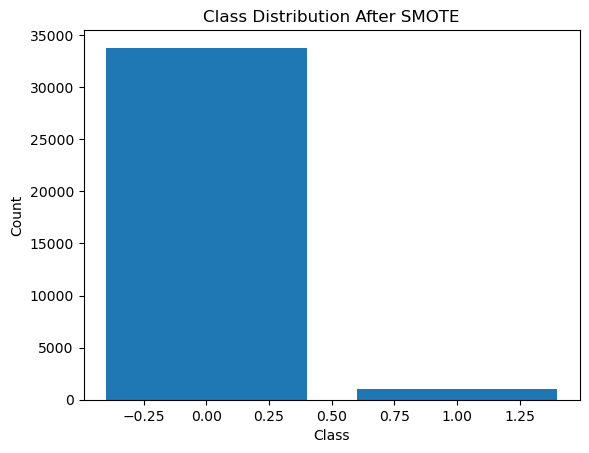

In [31]:
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of the SMOTE class for oversampling
smote = SMOTE(sampling_strategy=0.03, random_state=42)

# Oversample the training data using SMOTE
X_sm, y_sm = smote.fit_resample(X, y)

# Count the number of samples in each class after oversampling
unique, counts = np.unique(y_sm, return_counts=True)

# Plot the class distribution after SMOTE
plt.bar(unique, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()


# IMPLEMENTATION OF THE MODELS

## 1. Random Forest Model

### No-parameter tuning

Mean Accuracy: 0.9944258487765169
Cross-Validation Accuracy: 0.99


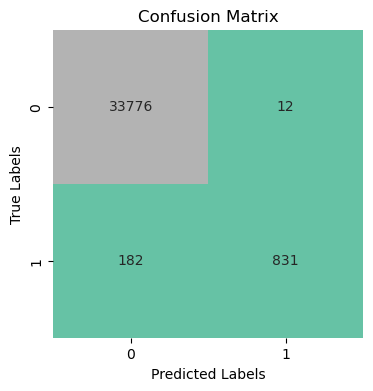

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     33788
           1       0.99      0.82      0.90      1013

    accuracy                           0.99     34801
   macro avg       0.99      0.91      0.95     34801
weighted avg       0.99      0.99      0.99     34801



In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation and generate predictions
y_pred_cv = cross_val_predict(rf_classifier, X_sm, y_sm, cv=5)

scores = cross_val_score(rf_classifier, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')


# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_sm, y_pred_cv)

# Define a custom color palette for the heatmap
color_palette = sns.color_palette("Set2")

# Create a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=color_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the classifier's performance using classification report
classification_report_result = classification_report(y_sm, y_pred_cv)

# Print the classification report
print('Classification Report (Cross-Validation):\n', classification_report_result)




### Hyperparameter tuning

Best Hyperparameters: {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Accuracy: 0.9944833076566157
Cross-Validation Accuracy: 0.99


<Figure size 300x300 with 0 Axes>

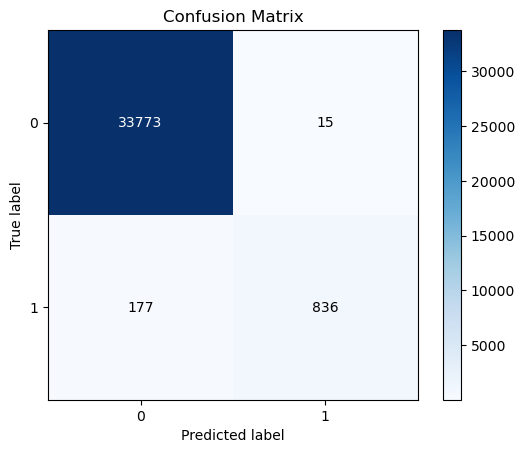

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     33788
           1       0.98      0.83      0.90      1013

    accuracy                           0.99     34801
   macro avg       0.99      0.91      0.95     34801
weighted avg       0.99      0.99      0.99     34801



In [55]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}
# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_sm, y_sm)

best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Perform cross-validation and generate predictions with the best classifier
y_pred_cv = cross_val_predict(best_rf_classifier, X_sm, y_sm, cv=5)


scores = cross_val_score(best_rf_classifier, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')

# Plot confusion matrix
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_sm, y_pred_cv)
plt.show()

# Generate a classification report with precision, recall, F1-score, and support
classification_rep = classification_report(y_sm, y_pred_cv)
print('Classification Report (Cross-Validation):\n', classification_rep)



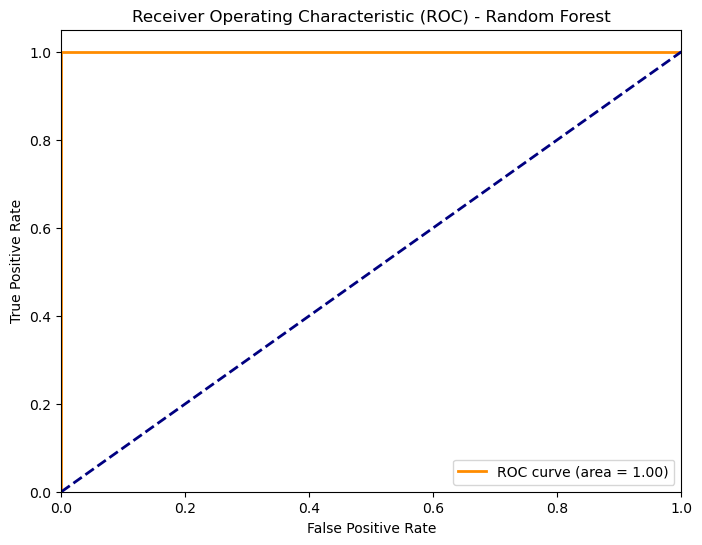

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Fit the best Random Forest classifier on your data
best_rf_classifier.fit(X_sm, y_sm)

# Calculate the ROC AUC score
roc_auc_rf = roc_auc_score(y_sm, best_rf_classifier.predict_proba(X_sm)[:, 1])

# Compute ROC curve values
fpr_rf, tpr_rf, _ = roc_curve(y_sm, best_rf_classifier.predict_proba(X_sm)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [61]:
import joblib

#Random Forest model
joblib.dump('best_rf_classifier', "random_forest_model.pkl")


['random_forest_model.pkl']

## 2. Naive Bayes Model

###  No-parameter tuning

Mean Accuracy: 0.9831618690008537
Cross-Validation Accuracy: 0.98


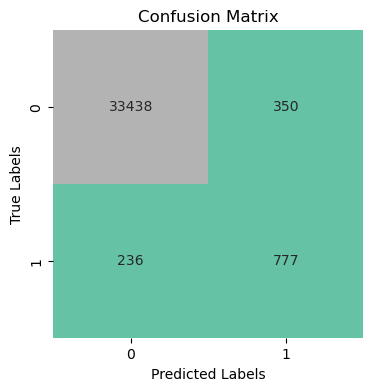

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     33788
           1       0.69      0.77      0.73      1013

    accuracy                           0.98     34801
   macro avg       0.84      0.88      0.86     34801
weighted avg       0.98      0.98      0.98     34801



In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
import scikitplot as skplt

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Perform cross-validation and generate predictions
y_pred_cv = cross_val_predict(naive_bayes_classifier, X_sm, y_sm, cv=5)


scores = cross_val_score(naive_bayes_classifier, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')


# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_sm, y_pred_cv)

# Define a custom color palette for the heatmap
color_palette = sns.color_palette("Set2")

# Create a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=color_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the classifier's performance using classification report
classification_report_result = classification_report(y_sm, y_pred_cv)

# Print the classification report
print('Classification Report (Cross-Validation):\n', classification_report_result)


# Hyperparameter tuning

Mean Accuracy: 0.9835065933848188
Cross-Validation Accuracy: 0.98


<Figure size 300x300 with 0 Axes>

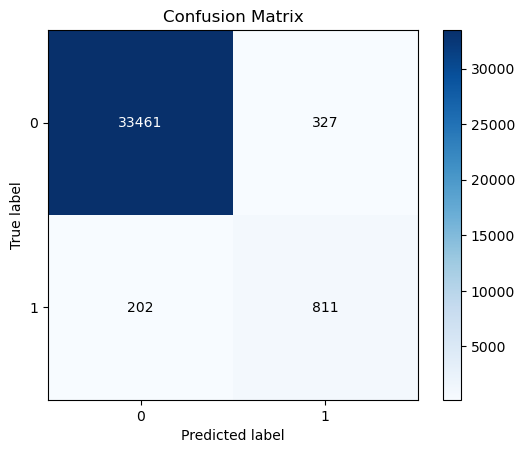

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     33788
           1       0.71      0.80      0.75      1013

    accuracy                           0.98     34801
   macro avg       0.85      0.90      0.87     34801
weighted avg       0.99      0.98      0.99     34801



In [37]:
# Define the hyperparameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


# Create the Repeated Stratified K-Fold cross-validator
# Define the number of splits and repeats (e.g., 5 splits, 3 repeats)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Create the GridSearchCV object
grid_search_1 = GridSearchCV(estimator=naive_bayes_classifier, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search_1.fit(X_sm,y_sm)


# Get the best parameters and the best estimator
best_params_nb = grid_search_1.best_params_
best_nb_classifier = grid_search_1.best_estimator_

# Evaluate the model on the test set
y_pred_nb = best_nb_classifier.predict(X_sm)


scores = cross_val_score(best_nb_classifier, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_nb)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')

# Plot confusion matrix
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_sm, y_pred_nb)
plt.show()

# Generate a classification report with precision, recall, F1-score, and support
classification_rep = classification_report(y_sm, y_pred_nb)
print('Classification Report (Cross-Validation):\n', classification_rep)





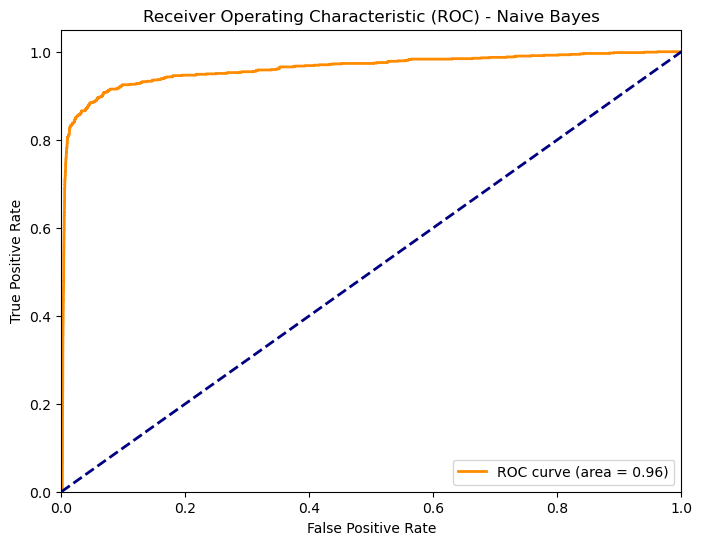

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_rf = roc_auc_score(y_sm, best_nb_classifier.predict_proba(X_sm)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_sm, best_nb_classifier.predict_proba(X_sm)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [54]:
import joblib

# Naive Bayes Model
joblib.dump('best_nb_classifier', "naive_bayes_model.pkl")

['naive_bayes_model.pkl']

## 3. Logistics Regression

### No-parameter tuning

Mean Accuracy: 0.9864950495948692
Cross-Validation Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33788
           1       0.89      0.61      0.72      1013

    accuracy                           0.99     34801
   macro avg       0.94      0.80      0.86     34801
weighted avg       0.99      0.99      0.99     34801



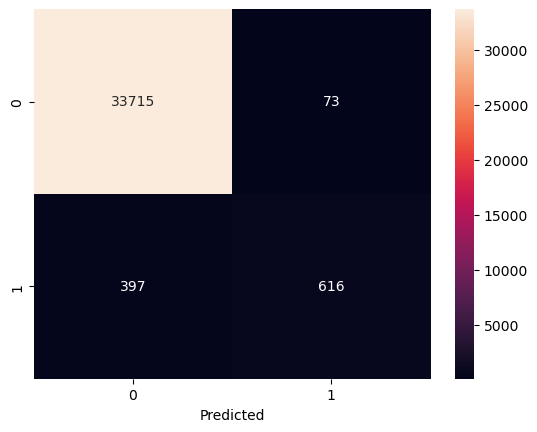

In [39]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_curve,auc, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
import scikitplot as skplt

# Define your Logistic Regression model
logistic_model = LogisticRegression()

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(logistic_model, X_sm, y_sm, cv=5)

scores = cross_val_score(logistic_model, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')


# Print classification report for cross-validated predictions
print(classification_report(y_sm, y_pred_cv))

# Create and display a confusion matrix for cross-validated predictions
sns.heatmap(confusion_matrix(y_sm, y_pred_cv), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.show()


### Hyperparameter tuning

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Mean Accuracy: 0.9867823976605289
Cross-Validation Accuracy: 0.99


<Figure size 300x300 with 0 Axes>

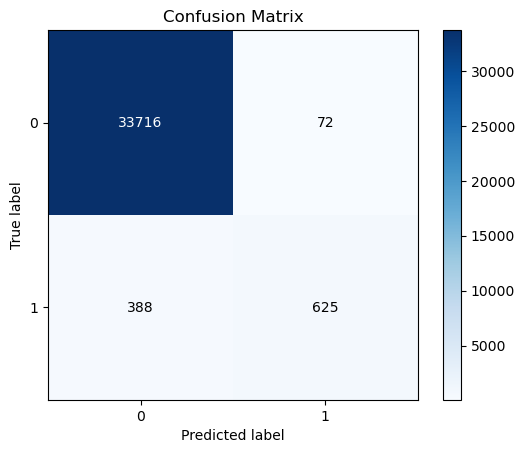

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     33788
           1       0.90      0.62      0.73      1013

    accuracy                           0.99     34801
   macro avg       0.94      0.81      0.86     34801
weighted avg       0.99      0.99      0.99     34801



In [40]:


# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10,100],
    'penalty': ['l1', 'l2']
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the resampled training data
grid_search.fit(X_sm, y_sm)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create the logistic regression classifier with the best hyperparameters
best_logistic_regression = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])


# Make predictions using cross-validation
y_pred_cv = cross_val_predict(best_logistic_regression, X_sm, y_sm, cv=5)

scores = cross_val_score(best_logistic_regression, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')

# Plot confusion matrix
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_sm, y_pred_cv)
plt.show()

# Generate a classification report with precision, recall, F1-score, and support
classification_rep = classification_report(y_sm, y_pred_cv)
print('Classification Report (Cross-Validation):\n', classification_rep)




In [41]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_sm, y_pred_cv)
roc_auc = auc(fpr, tpr)

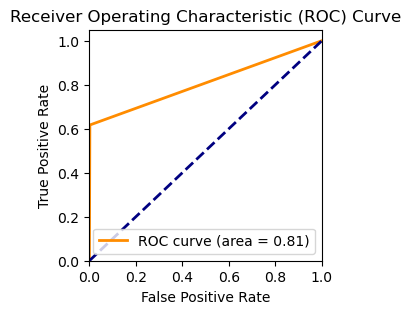

In [42]:
# Plot ROC curve
plt.figure(figsize=(3, 3)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_sm, y_pred_cv).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

Specificity: 0.9978690659405706


In [49]:
import joblib

#Logistic Regression model
joblib.dump('best_logistic_regression', "logistic_regression_model.pkl")


['logistic_regression_model.pkl']

## 4. Support Vector Machine Model

### No-parameter tuning

Mean Accuracy: 0.991121366661878
Cross-Validation Accuracy: 0.99


<Figure size 300x300 with 0 Axes>

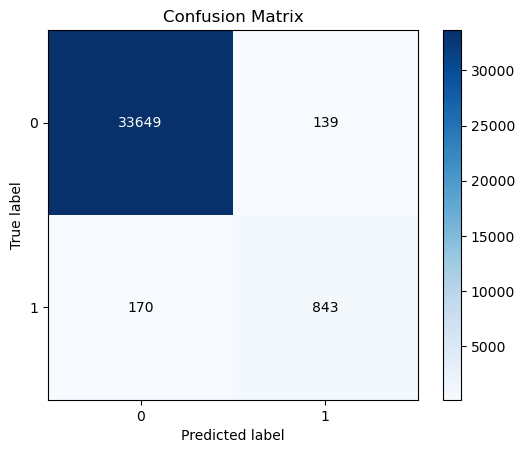

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     33788
           1       0.86      0.83      0.85      1013

    accuracy                           0.99     34801
   macro avg       0.93      0.91      0.92     34801
weighted avg       0.99      0.99      0.99     34801



In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt

# Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_sm)

# Create an SVM classifier with balanced class weights
svm_classifier = SVC(random_state=42, class_weight='balanced', probability=True)

# Perform cross-validation and generate predictions
y_pred_cv = cross_val_predict(svm_classifier, X_resampled, y_sm, cv=5)

scores = cross_val_score(svm_classifier, X_resampled, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')

# Plot confusion matrix
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_sm, y_pred_cv)
plt.show()

# Generate classification report with precision, recall, F1-score, and support
classification_rep = classification_report(y_sm, y_pred_cv)
print('Classification Report (Cross-Validation):\n', classification_rep)


### Hyperparameter tuning

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Mean Accuracy: 0.9935351556372366
Cross-Validation Accuracy: 0.99


<Figure size 300x300 with 0 Axes>

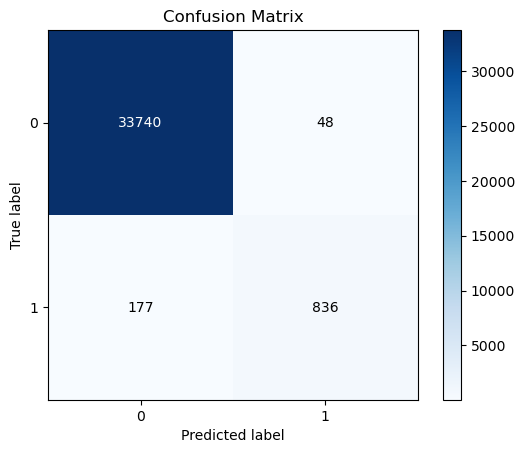

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     33788
           1       0.95      0.83      0.88      1013

    accuracy                           0.99     34801
   macro avg       0.97      0.91      0.94     34801
weighted avg       0.99      0.99      0.99     34801



In [50]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search
param_grid = {
    'kernel': ['linear', 'rbf'],  #Possible kernel functions
    'C': [0.1, 1, 10]  # Values of C
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_resampled, y_sm)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create the SVM classifier with the best hyperparameters
best_svm_classifier = SVC(class_weight='balanced', random_state=42, **best_params)

# Perform cross-validation and generate predictions with the best SVM classifier
y_pred_cv = cross_val_predict(best_svm_classifier, X_resampled, y_sm, cv=5)

scores = cross_val_score(best_svm_classifier, X_resampled, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')

# Plot confusion matrix
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_sm, y_pred_cv)
plt.show()

# Generate a classification report with precision, recall, F1-score, and support
classification_rep = classification_report(y_sm, y_pred_cv)
print('Classification Report (Cross-Validation):\n', classification_rep)


In [51]:
import joblib

#Support Vector Machine model
joblib.dump('best_svm_classifier', "support_vector_machine_model.pkl")


['support_vector_machine_model.pkl']

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_rf = roc_auc_score(y_sm, best_svm_classifier.predict_proba(X_resampled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_sm, best_svm_classifier.predict_proba(X_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

AttributeError: predict_proba is not available when probability=False

In [53]:
# Get the probability scores for the positive class (class 1)
y_prob = best_svm_classifier.decision_function(X_resampled)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_sm, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_sm, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 5. KNN (K - Nearest Neighbors)

### No-parameter tuning

Mean Accuracy: 0.9887647476003416
Cross-Validation Accuracy: 0.99
Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     33788
           1       0.80      0.82      0.81      1013

    accuracy                           0.99     34801
   macro avg       0.90      0.91      0.90     34801
weighted avg       0.99      0.99      0.99     34801



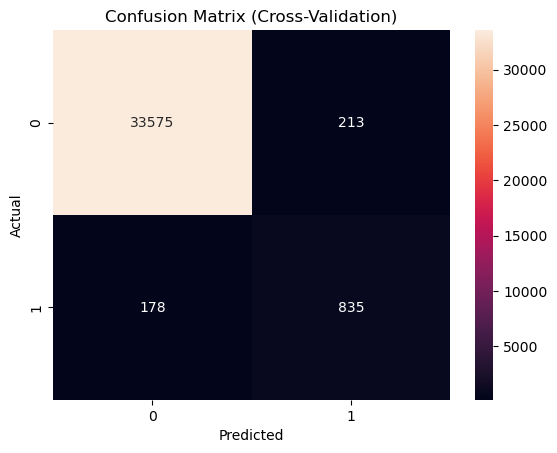

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Perform cross-validation and generate a classification report
y_pred_cv = cross_val_predict(knn_classifier, X_sm, y_sm, cv=5)  # X is your feature matrix, y is your target variable

scores = cross_val_score(knn_classifier, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')



# Generate a classification report for the cross-validated predictions
report_cv = classification_report(y_sm, y_pred_cv)
print('Classification Report (Cross-Validation):\n', report_cv)

# If you want to create a heatmap of the confusion matrix, you can do so:
cm_cv = confusion_matrix(y_sm, y_pred_cv)
sns.heatmap(cm_cv, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()


### Hyper Parameter Tuning

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean Accuracy: 0.9933336635805068
Cross-Validation Accuracy: 0.99
Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33788
           1       0.85      0.94      0.89      1013

    accuracy                           0.99     34801
   macro avg       0.92      0.97      0.94     34801
weighted avg       0.99      0.99      0.99     34801



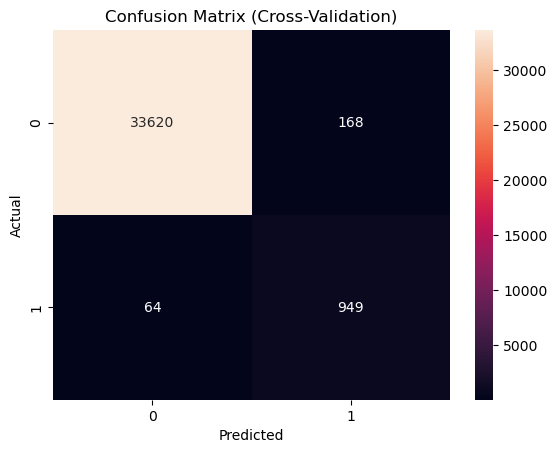

In [47]:

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Experiment with different neighbor values
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the resampled data
grid_search.fit(X_sm, y_sm)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create the KNN classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                           weights=best_params['weights'], p=best_params['p'])

# Use cross-validation with the best hyperparameters
y_pred_cv = cross_val_predict(best_knn_classifier, X_sm, y_sm, cv=5)

scores = cross_val_score(best_knn_classifier, X_sm, y_sm, cv=5, scoring='accuracy')
# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print('Mean Accuracy:', mean_accuracy)

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_sm, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy:.2f}')


# Generate a classification report for the cross-validated predictions
report_cv = classification_report(y_sm, y_pred_cv)
print('Classification Report (Cross-Validation):\n', report_cv)

# Create a heatmap of the confusion matrix for the cross-validated predictions
cm_cv = confusion_matrix(y_sm, y_pred_cv)
sns.heatmap(cm_cv, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Calculate ROC curve and AUC
y_prob = cross_val_predict(best_knn_classifier, X_sm, y_sm, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_sm, y_prob)
roc_auc = auc(fpr, tpr)

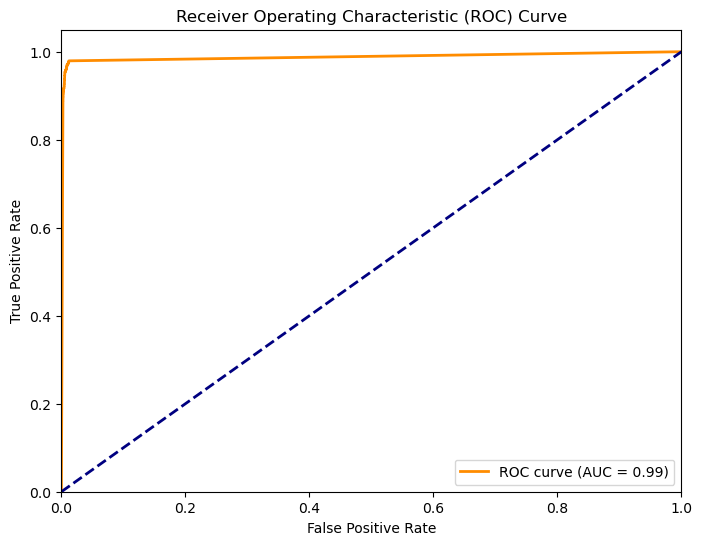

In [41]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [42]:
import joblib

#KNN model
joblib.dump('best_knn_classifier', "KNN_model.pkl")

['KNN_model.pkl']

# Model Evaluation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Sample data
model_names = ['RFM', 'NB', 'LR', 'SVM', 'KNN']
precision_class0 = [0.99, 0.99, 0.99, 0.99, 0.99]
recall_class0 = [1.00, 0.99, 1.00, 1.00, 1.00]
f1_score_class0 = [1.00, 0.99, 0.99, 1.00, 1.00]
precision_class1 = [1.00, 0.76, 0.92, 0.98, 1.00]
recall_class1 = [0.83, 0.78, 0.58, 0.82, 0.76]
f1_score_class1 = [0.91, 0.77, 0.71, 0.90, 0.87]


# Set the width of each bar
bar_width = 0.3

# Set the x positions of the bars
x = np.arange(len(model_names))

# Create the bar chart for precision
plt.bar(x, precision_class0, width=bar_width, label='Precision',color="#142966")

# Create the bar chart for recall, shifted by bar_width
plt.bar(x + bar_width, recall_class0, width=bar_width, label='Recall',color="#520052")

# Create the bar chart for F1-score, shifted by 2*bar_width
plt.bar(x + 2*bar_width, f1_score_class0, width=bar_width, label='F1-Score',color="#0F3D0F")

# Set labels and legends
plt.xlabel('Model Names')
plt.ylabel('Values')
plt.title('Non-fraudulent')
plt.xticks(x + bar_width, model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for Class 1
model_names = ['RFM', 'NB', 'LR', 'SVM', 'KNN']
precision_class1 = [1.00, 0.76, 0.92, 0.98, 1.00]
recall_class1 = [0.83, 0.78, 0.58, 0.82, 0.76]
f1_score_class1 = [0.91, 0.77, 0.71, 0.90, 0.87]

# Set the width of each bar
bar_width = 0.3

# Set the x positions of the bars
x = np.arange(len(model_names))

# Create the bar chart for precision
plt.bar(x, precision_class1, width=bar_width, label='Precision',color="#142966")

# Create the bar chart for recall, shifted by bar_width
plt.bar(x + bar_width, recall_class1, width=bar_width, label='Recall',color="#520052")

# Create the bar chart for F1-score, shifted by 2*bar_width
plt.bar(x + 2*bar_width, f1_score_class1, width=bar_width, label='F1-Score',color="#0F3D0F")

# Set labels and legends
plt.xlabel('Model Names')
plt.ylabel('Values')
plt.title('Fraudulant')
plt.xticks(x + bar_width, model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
